# Final Project
## Jameson Railey, Hunter Lebow, and James Andradas

## Executive Summary

#### The Problem
As the environmental sustainability movement surges, more and more companies are investing in renewable forms of energy. A popular renewable energy source these companies are utilizing is wind energy. Designing a wind park optimally is crucial for these companies to reduce costs and increase production. A problem arises due to the fact that there are many factors involved in designing a wind park. It is almost impossible to design the park in the most optimal manner without using mathematical optimization. One of the most important factors of a wind park that should be optimized is wind turbine location. Optimizing this factor is extremely challenging, and energy companies require assistance in order to do so effectively so they can reduce costs, increase production, and help the environment. A company in Lewisburg wants to build a wind farm, and we were hired to optimize the wind turbine layout, while minimizing the environmental impact. The company will not receive funding to build the farm if it has an environmental impact score above fifty. 

#### Why It Matters
Utilizing mathematical optimization techniques to optimize wind turbine location is extremely important for companies as it can lead to huge savings for them and protect the environment. In turn, optimization techniques that optimize wind turbine location can help provide electricity without burning fossil fuels and polluting the air, which in turn would help the world combat climate change. 

#### How To Solve It
The main problem that is solved when designing a new wind park is what the optimal layout of wind turbines is. Finding the optimal layout is important because it leads to higher power production. The optimizer should consider how much power and revenue each turbine will generate, along with how much each turbine costs. We must use an objective function that maximizes the total profit, by subtracting the total cost from revenue, and considers the environmental impact of each turbine. The constraints of this model are the maximum number of turbines per plot of land and the maximum detriment to the environment that is allowed in order to receive funding for the wind farm. 

Another consideration is the environmental factors of each turbine and the wind farm as a whole.  The higher the power output is on each turbine, the more harmful it is for the environment.  This is because   We calculated a custom metric we call environmental impact score, with 0 being the best and 10 being the worst.. This score is calculated for each wind turbine based on its power output. We want to make sure that our wind farm as a whole does not exceed 50 environmental points.  Achieving this will increase the project’s likelihood of funding and acceptance into the Lewisburg community.


#### Our Recommendation
As stated earlier, our model maximizes the total profit whilst considering the environmental impact of each turbine built. However, there are many other steps or considerations that can be  involved in the design of a wind park to find it’s optimal location. To improve our model even further, we’d recommend that one would optimize one of the steps that was not talked about in the original paper. This is talked about below. 

#### Where We Could Go Next
Once the turbine layout has been optimized, the second part of the problem deals with finding the optimal cable connections between all the turbines and the given collection point offshore so that the total cable cost can be minimized. The constraints for this part of the optimization problem are that the energy leaving a turbine must be supported by a single cable, the maximum energy flow in each connection cannot exceed the capacity of the installed cable, cables that have different capacities, costs, and electrical resistances can be installed, cable crossings must be avoided, and that a maximum number (that is given) of cables can be connected to each substation. There are many other things that come in consideration when solving this part of the problem but the constraints highlighted earlier are what’s most important. 

Regarding the design of the turbine foundation, the optimal foundation minimizes the total mass of the structure.  The foundation also must meet the following criteria.  It should be able to withstand local stresses and damage. Chord tubes, a foundation material, should have larger diameter than brace tubes, another foundation material.  Finally, one tube type should be selected for each connection made in the foundation.  

The farther apart the turbines, the higher the infrastructure costs are to connect. Therefore, we could also try to optimize the wind farm layout and cable routing together, as the wind farm layout spreads the turbines as far as possible. However, since problems one and two are already complex when solving them individually, challenges may arise when trying to combine them. The paper mentions that this could be one of the subsequent directions to take the paper in. 

In [1]:
import matplotlib.pyplot as plt
import random
import gurobipy as gb
import numpy as np

In [3]:
x = -4
y = -2

x_vals = []
y_vals = []
for i in range(10):
    y = -2
    for j in range(5):
        x_vals.append(x)
        y_vals.append(y)
        y += 1
    x += 1      

## Map of the Turbine Farm

#### Each point is a potential location where a turbine can be built

Text(5, 2, '50')

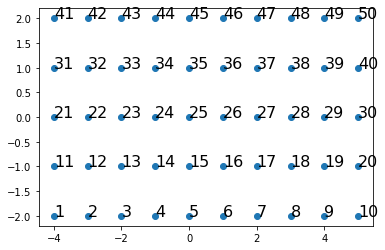

In [4]:
plt.scatter(x_vals,y_vals)
plt.text(x=-4, y=-2, s=str(1), fontdict=dict(color = "black", size = 16))
plt.text(x=-3, y=-2, s=str(2), fontdict=dict(color = "black", size = 16))
plt.text(x=-2, y=-2, s=str(3), fontdict=dict(color = "black", size = 16))
plt.text(x=-1, y=-2, s=str(4), fontdict=dict(color = "black", size = 16))
plt.text(x=0, y=-2, s=str(5), fontdict=dict(color = "black", size = 16))
plt.text(x=1, y=-2, s=str(6), fontdict=dict(color = "black", size = 16))
plt.text(x=2, y=-2, s=str(7), fontdict=dict(color = "black", size = 16))
plt.text(x=3, y=-2, s=str(8), fontdict=dict(color = "black", size = 16))
plt.text(x=4, y=-2, s=str(9), fontdict=dict(color = "black", size = 16))
plt.text(x=5, y=-2, s=str(10), fontdict=dict(color = "black", size = 16))

plt.text(x=-4, y=-1, s=str(11), fontdict=dict(color = "black", size = 16))
plt.text(x=-3, y=-1, s=str(12), fontdict=dict(color = "black", size = 16))
plt.text(x=-2, y=-1, s=str(13), fontdict=dict(color = "black", size = 16))
plt.text(x=-1, y=-1, s=str(14), fontdict=dict(color = "black", size = 16))
plt.text(x=0, y=-1, s=str(15), fontdict=dict(color = "black", size = 16))
plt.text(x=1, y=-1, s=str(16), fontdict=dict(color = "black", size = 16))
plt.text(x=2, y=-1, s=str(17), fontdict=dict(color = "black", size = 16))
plt.text(x=3, y=-1, s=str(18), fontdict=dict(color = "black", size = 16))
plt.text(x=4, y=-1, s=str(19), fontdict=dict(color = "black", size = 16))
plt.text(x=5, y=-1, s=str(20), fontdict=dict(color = "black", size = 16))

plt.text(x=-4, y=0, s=str(21), fontdict=dict(color = "black", size = 16))
plt.text(x=-3, y=0, s=str(22), fontdict=dict(color = "black", size = 16))
plt.text(x=-2, y=0, s=str(23), fontdict=dict(color = "black", size = 16))
plt.text(x=-1, y=0, s=str(24), fontdict=dict(color = "black", size = 16))
plt.text(x=0, y=0, s=str(25), fontdict=dict(color = "black", size = 16))
plt.text(x=1, y=0, s=str(26), fontdict=dict(color = "black", size = 16))
plt.text(x=2, y=0, s=str(27), fontdict=dict(color = "black", size = 16))
plt.text(x=3, y=0, s=str(28), fontdict=dict(color = "black", size = 16))
plt.text(x=4, y=0, s=str(29), fontdict=dict(color = "black", size = 16))
plt.text(x=5, y=0, s=str(30), fontdict=dict(color = "black", size = 16))

plt.text(x=-4, y=1, s=str(31), fontdict=dict(color = "black", size = 16))
plt.text(x=-3, y=1, s=str(32), fontdict=dict(color = "black", size = 16))
plt.text(x=-2, y=1, s=str(33), fontdict=dict(color = "black", size = 16))
plt.text(x=-1, y=1, s=str(34), fontdict=dict(color = "black", size = 16))
plt.text(x=0, y=1, s=str(35), fontdict=dict(color = "black", size = 16))
plt.text(x=1, y=1, s=str(36), fontdict=dict(color = "black", size = 16))
plt.text(x=2, y=1, s=str(37), fontdict=dict(color = "black", size = 16))
plt.text(x=3, y=1, s=str(38), fontdict=dict(color = "black", size = 16))
plt.text(x=4, y=1, s=str(39), fontdict=dict(color = "black", size = 16))
plt.text(x=5, y=1, s=str(40), fontdict=dict(color = "black", size = 16))

plt.text(x=-4, y=2, s=str(41), fontdict=dict(color = "black", size = 16))
plt.text(x=-3, y=2, s=str(42), fontdict=dict(color = "black", size = 16))
plt.text(x=-2, y=2, s=str(43), fontdict=dict(color = "black", size = 16))
plt.text(x=-1, y=2, s=str(44), fontdict=dict(color = "black", size = 16))
plt.text(x=0, y=2, s=str(45), fontdict=dict(color = "black", size = 16))
plt.text(x=1, y=2, s=str(46), fontdict=dict(color = "black", size = 16))
plt.text(x=2, y=2, s=str(47), fontdict=dict(color = "black", size = 16))
plt.text(x=3, y=2, s=str(48), fontdict=dict(color = "black", size = 16))
plt.text(x=4, y=2, s=str(49), fontdict=dict(color = "black", size = 16))
plt.text(x=5, y=2, s=str(50), fontdict=dict(color = "black", size = 16))

In [5]:
num_turbines = 50

## Wind Turbine Annual Power Output

Variables: 

- $P$ = Annual power output in KWh (kilowatt hours)
- $MC$ = Maximum capacity (kW)
- $C$ = Capcity factor (%)

Equation:

$P = MC * C * 365 * 24$

#### Maximum Capacity per Turbine

In [6]:
max_capacities = [random.randrange(1000, 2400) for i in range(num_turbines)]

#### Capacity Factor per Turbine

In [7]:
capacity_factor = [random.uniform(.1,.4) for i in range(num_turbines)]

#### Power Generated per Turbine

In [8]:
power_values = [(365 * 24 * max_capacities[i] * capacity_factor[i]) for i in range(num_turbines)]

## Revenue Per Turbine

According to engineering.com, the national average electric rate is $.12/kWh. Therefore, the annual amount saved per turbine can be defined as:

$A = P * \$.12$

In [9]:
revenue_per_turbine = [round((power_values[i] * .12),2) for i in range(num_turbines)]

## Cost per Turbine

Variables:

- $I$ = Installation Cost (constant)
- $MC$ = Maintenance Cost (10% of power output)
- $TC$ = Total Cost

Equations:


- $ I = \$200,000 $
- $ MC = P * .20$
- $ TC = \frac{I}{20} + MC$ (divide I by 20 because the turbines have a life of 20 years)

In [10]:
total_cost_per_turbine = [((200000/20) + (power_values[i]*.1)) for i in range(num_turbines)]

## Profit per Turbine

In [11]:
profit = [round(revenue_per_turbine[i] - total_cost_per_turbine[i], 2) for i in range(num_turbines)]

## Environmental Factor

#### Turbines have a harmful impact on the environment and nearby habitats. The higher the environmental score, the more detriment the turbine has on the surrounding environment. The environmental score must be below a certain amount in order for the turbine farm to get funding.

#### Variables

- E = Environmental Factor
- P = Power output

#### Equation

- $E = P*(1x10^{-5}) $

In [12]:
environmental_factor_scores = [round((power_values[i]*.000001),1) for i in range(num_turbines)]

## Building the Model

In [13]:
model_turbines = gb.Model()

Restricted license - for non-production use only - expires 2023-10-25


In [14]:
turbines = [i+1 for i in range(num_turbines)]

## Adding turbine variables

In [15]:
turbine_var = model_turbines.addVars(turbines, vtype = gb.GRB.BINARY)

## Constraints

#### There cannot be more than three turbines per column due to the wake effect

In [16]:
# Column constraint

model_turbines.addConstr(turbine_var[1] + turbine_var[11] + turbine_var[21] + turbine_var[31] + turbine_var[41] <= 3)
model_turbines.addConstr(turbine_var[2] + turbine_var[12] + turbine_var[22] + turbine_var[32] + turbine_var[42] <= 3)
model_turbines.addConstr(turbine_var[3] + turbine_var[13] + turbine_var[23] + turbine_var[33] + turbine_var[43] <= 3)
model_turbines.addConstr(turbine_var[4] + turbine_var[14] + turbine_var[24] + turbine_var[34] + turbine_var[44] <= 3)
model_turbines.addConstr(turbine_var[5] + turbine_var[15] + turbine_var[25] + turbine_var[35] + turbine_var[45] <= 3)
model_turbines.addConstr(turbine_var[6] + turbine_var[16] + turbine_var[26] + turbine_var[36] + turbine_var[46] <= 3)
model_turbines.addConstr(turbine_var[7] + turbine_var[17] + turbine_var[27] + turbine_var[37] + turbine_var[47] <= 3)
model_turbines.addConstr(turbine_var[8] + turbine_var[18] + turbine_var[28] + turbine_var[38] + turbine_var[48] <= 3)
model_turbines.addConstr(turbine_var[9] + turbine_var[19] + turbine_var[29] + turbine_var[39] + turbine_var[49] <= 3)
model_turbines.addConstr(turbine_var[10] + turbine_var[20] + turbine_var[30] + turbine_var[40] + turbine_var[50] <= 3)

<gurobi.Constr *Awaiting Model Update*>

#### There cannot be more than seven turbines per row due to the wake effect

In [17]:
# Row constraint

model_turbines.addConstr(turbine_var[1] + turbine_var[2] + turbine_var[3] + turbine_var[4] + turbine_var[5] + 
                        turbine_var[6] + turbine_var[7] + turbine_var[8] + turbine_var[9] + turbine_var[10] <= 7)
model_turbines.addConstr(turbine_var[11] + turbine_var[12] + turbine_var[13] + turbine_var[14] + turbine_var[15] + 
                        turbine_var[16] + turbine_var[17] + turbine_var[18] + turbine_var[19] + turbine_var[20] <= 7)
model_turbines.addConstr(turbine_var[21] + turbine_var[22] + turbine_var[23] + turbine_var[24] + turbine_var[25] + 
                        turbine_var[26] + turbine_var[27] + turbine_var[28] + turbine_var[29] + turbine_var[30] <= 7)
model_turbines.addConstr(turbine_var[31] + turbine_var[32] + turbine_var[33] + turbine_var[34] + turbine_var[35] + 
                        turbine_var[36] + turbine_var[37] + turbine_var[38] + turbine_var[39] + turbine_var[40] <= 7)
model_turbines.addConstr(turbine_var[41] + turbine_var[42] + turbine_var[43] + turbine_var[44] + turbine_var[45] + 
                        turbine_var[46] + turbine_var[47] + turbine_var[48] + turbine_var[49] + turbine_var[50] <= 7)

<gurobi.Constr *Awaiting Model Update*>

#### The total environmental score must be below 50

In [18]:
model_turbines.addConstr(gb.quicksum(turbine_var[i+1]*environmental_factor_scores[i] for i in range(num_turbines)) <= 50)

<gurobi.Constr *Awaiting Model Update*>

## Objective Function

#### Goal is to Maximize Profit

In [19]:
model_turbines.setObjective(gb.quicksum(turbine_var[i+1]*profit[i] for i in range(num_turbines)), gb.GRB.MAXIMIZE)

In [20]:
model_turbines.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 16 rows, 50 columns and 150 nonzeros
Model fingerprint: 0xf360c75b
Variable types: 0 continuous, 50 integer (50 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+00]
  Objective range  [1e+04, 1e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 5e+01]
Found heuristic solution: objective 848138.53000
Presolve time: 0.00s
Presolved: 16 rows, 50 columns, 150 nonzeros
Variable types: 0 continuous, 50 integer (50 binary)
Found heuristic solution: objective 851819.63000

Root relaxation: objective 9.176869e+05, 18 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 917686.900    0    1 851819.630 917686.900  7.73%     -    0s
H    0     0                    904

## Turbines that should be built

In [21]:
for i in turbines:
    if turbine_var[i].x == 1:
        print(i, profit[i-1], environmental_factor_scores[i-1])

10 123653.88 6.7
11 143715.82 7.7
13 66966.0 3.8
14 72424.76 4.1
31 72375.55 4.1
34 90782.65 5.0
40 124616.38 6.7
42 113803.77 6.2
45 104235.15 5.7


#### Potential points where a turbine could be built

In [22]:
turbine_coordinates = []

x = 0
y = 0

x_vals = []
y_vals = []
for i in range(5):
    x = 0
    for j in range(10):
        turbine_coordinates.append((x,y))
        x += 1
    y += 1 
print(turbine_coordinates)

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (5, 4), (6, 4), (7, 4), (8, 4), (9, 4)]


In [23]:
x_turbine_location = []
y_turbine_location = []
for i in range(num_turbines):
    if turbine_var[i+1].x == 1:
        x_turbine_location.append(turbine_coordinates[i][0])
        y_turbine_location.append(turbine_coordinates[i][1])

## Turbine Map

([<matplotlib.axis.YTick at 0x1a0a84752e0>,
 <a list of 9 Text major ticklabel objects>)

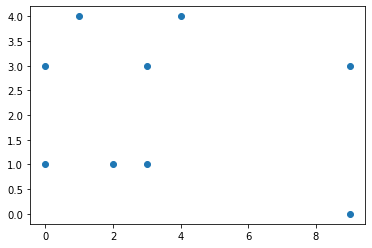

In [24]:
plt.scatter(x_turbine_location,y_turbine_location)
plt.yticks(np.arange(0,4.5,.5))